### Have the Tesla Models Lived Up to the Expectations of its Investors?

#### Introduction

Tesla is one company that has gracefully revolutionized the automotive industry with innovative electric vehicles that boast features that were previously unheard of in automobiles and now in semi-trailer trucks. With an enormous market cap of over $580 billion, Tesla is the world's largest EV car manufacturer in the world, and had their IPO on June 29th 2010. 

Since their IPO, the Tesla stock has experienced an astonishing 13,237.81% increase in its nominal value. This exploration aims to grasp investor reactions to the release of new Tesla models over time and elaborate upon the findings. 

#### Methodology

Although understanding investor reactions, in general is a complex task, a key measure of this can be the movement of the stock price following the announcement/sale of the new model. Logically, positive reactions would imply an upward trend in the stock price for a variable amount of time, as investors would expect an increase profits. Similarly, negative reactions, i.e., situations where investors in particular would fear for the profitability of the company, would imply a downward trend in stock price following the release of the model. 

To understand this, we will observe the movement of Tesla's normalized stock price for a period of 3 days before and 3 days after the announcement date. The date of the announcement itself will be referred to as 'Day 0.'

Given that the models were all released in different months and/or years, it is important for us to normalize the stock price across models and time, so we can perform an intertemporal analysis to help us draw conclusions. This exploration will use the following method to normalize the stock price:-

1. <b>Constant Factor Multiplication</b>: This trivial method will set the price of the stock as `$100` on the day of the announcement and adjust all other prices for the individual models accordingly. 

#### Introducing and Preparing the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('MacroTrends_Data_Download_TSLA.csv')
data

,MacroTrends Data Download,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,TSLA - Historical Price and Volume Data,NaN,NaN,NaN,NaN,NaN
1,Note: Historical prices are adjusted for stock...,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Disclaimer and Terms of Use: Historical stock ...,NaN,NaN,NaN,NaN,NaN
4,MacroTrends LLC expressly disclaims the accura...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3247,3/5/2023,160.01,165,159.91,160.61,118820485
3248,4/5/2023,162.71,162.95,159.65,161.2,94560796
3249,5/5/2023,163.97,170.7899,163.51,170.06,106103861
3250,8/5/2023,173.72,173.8,169.19,171.79,111850120


Since the CSV file had some additional unwanted information in the first 13 rows, we're going to go ahead and clean the data in a way that it's ready for further analysis. 

In [4]:
data=data.drop(range(0,14),axis=0) #Dropping the first 13 rows 
data.head()

,MacroTrends Data Download,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
14,29/6/2010,1.2667,1.6667,1.1693,1.5927,281494500
15,30/6/2010,1.7193,2.0279,1.5533,1.5887,257806500
16,1/7/2010,1.6667,1.728,1.3513,1.464,123282000
17,2/7/2010,1.5333,1.54,1.2473,1.28,77097000
18,6/7/2010,1.3333,1.3333,1.0553,1.074,103003500


In [5]:
data.columns=['Date','Open','High','Low','Close','Volume'] #Renaming the columns 
data

,Date,Open,High,Low,Close,Volume
14,29/6/2010,1.2667,1.6667,1.1693,1.5927,281494500
15,30/6/2010,1.7193,2.0279,1.5533,1.5887,257806500
16,1/7/2010,1.6667,1.728,1.3513,1.464,123282000
17,2/7/2010,1.5333,1.54,1.2473,1.28,77097000
18,6/7/2010,1.3333,1.3333,1.0553,1.074,103003500
...,...,...,...,...,...,...
3247,3/5/2023,160.01,165,159.91,160.61,118820485
3248,4/5/2023,162.71,162.95,159.65,161.2,94560796
3249,5/5/2023,163.97,170.7899,163.51,170.06,106103861
3250,8/5/2023,173.72,173.8,169.19,171.79,111850120


In [6]:
data['Date']=pd.to_datetime(data['Date'],format='%d/%m/%Y')

In [7]:
data=data.set_index('Date')

In [8]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,1.2667,1.6667,1.1693,1.5927,281494500
2010-06-30,1.7193,2.0279,1.5533,1.5887,257806500
2010-07-01,1.6667,1.728,1.3513,1.464,123282000
2010-07-02,1.5333,1.54,1.2473,1.28,77097000
2010-07-06,1.3333,1.3333,1.0553,1.074,103003500


In [9]:
#The values in the table although numbers are not recognized as a 'numeric' data type
#This line of code allows us to convert all the values to the accurate 'numeric' data type

list1=['Open','High','Low','Close','Volume'] 
for i,column in enumerate(list1):
    data[column]=pd.to_numeric(data[column])
data.head() 

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,1.2667,1.6667,1.1693,1.5927,281494500
2010-06-30,1.7193,2.0279,1.5533,1.5887,257806500
2010-07-01,1.6667,1.7280,1.3513,1.4640,123282000
2010-07-02,1.5333,1.5400,1.2473,1.2800,77097000
2010-07-06,1.3333,1.3333,1.0553,1.0740,103003500


Lets look at how the stock price of Tesla has changed over time and if we can identify any growth patterns.

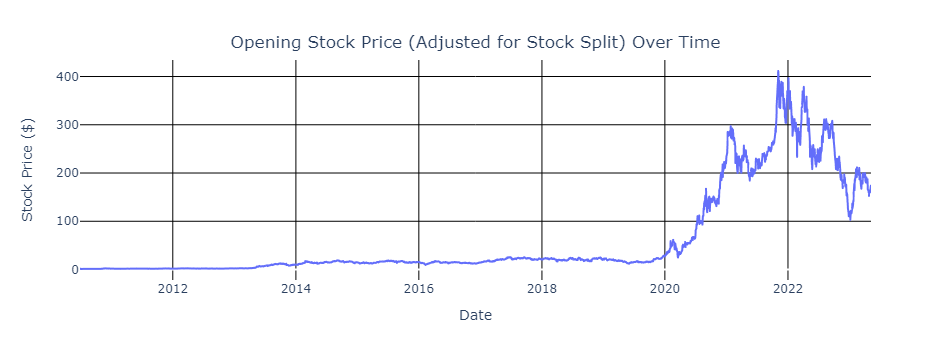

In [10]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
fig=px.line(data['Open'])
fig.update_layout(plot_bgcolor='white',
                  xaxis_title='Date',
                  yaxis_title='Stock Price ($)',
                  xaxis=dict(showgrid=True,gridcolor='black',gridwidth=1),
                  yaxis=dict(showgrid=True,gridcolor='black',gridwidth=1),
                  title={'text':'Opening Stock Price (Adjusted for Stock Split) Over Time',
                         'x':0.5,
                         'y':0.9})
                 
fig.update_traces(showlegend=False)
fig.show()

#### Some Interesting Observations/Notes
1. Tesla approved a 3-for-1 stock split on August 4th 2022, and trading on stock split adjusted basis began on August 25th 2022. 

2. The growth in the stock price was fairly linear until Q1 2020 after which the stock saw exponential growth. There are a number of reasons for this that are craftfully discussed in this article by Forbes in the following article. 

    https://www.investopedia.com/why-tesla-skyrocketed-during-pandemic-5211590 

3. Post Q1 2020, the Tesla stock seems to have been exposed to a much greater degree of volatility which stock prices increasing/decreasing by a significant amount over a short span of time. 

#### Announcement Dates

Through some simple research, we found the announcement dates for all the models that were announced following the IPO. 

Here, the 'announcement date' refers to the first time company unveiled the idea of the models with or without the prototype to the public, i.e., the first public announcement of the new models. 

In [11]:
Models=['Model X','Model 3', 'Model Y', 'Cybertruck','Semi']
Announcement_Dates=['09/02/2012','31/03/2016','14/03/2019','21/11/2019','16/11/2017']
announcement_dates=pd.DataFrame({'Model':Models,'Announcement Dates':Announcement_Dates})
announcement_dates=announcement_dates.set_index('Model')
announcement_dates['Announcement Dates']=pd.to_datetime(announcement_dates['Announcement Dates'],format='%d/%m/%Y')
announcement_dates

,Announcement Dates
Model,
Model X,2012-02-09
Model 3,2016-03-31
Model Y,2019-03-14
Cybertruck,2019-11-21
Semi,2017-11-16


Now, in line with our methodology, we need to find the share prices for 3 days before and 3 days after the announcement date. This is done through the following line of code. 

In [12]:
#Model X share prices
model_x=data.loc['2012-02-06':'2012-02-14']
model_3=data.loc['2016-03-28':'2016-04-05']
model_Y=data.loc['2019-03-11':'2019-03-19']
cybertruck=data.loc['2019-11-18':'2019-11-26']
semi=data.loc['2017-11-13':'2017-11-21']

def reset_index(dataset):
    dataset=dataset.reset_index().drop('Date',axis=1)
    dataset['Delta Days']=['-3','-2','-1','0','1','2','3']
    return dataset.set_index('Delta Days')


The following lines of code aid us to simplify the contents of the table in a way that would help us with data visualization. 

In [13]:
model_x=reset_index(model_x)
model_3=reset_index(model_3)
model_Y=reset_index(model_Y)
cybertruck=reset_index(cybertruck)
semi=reset_index(semi)

In [14]:
data_final=pd.concat([model_x,model_3,model_Y,cybertruck,semi],axis=1)
data_final=data_final.drop(['High','Low','Close','Volume'],axis=1)

In [15]:
data_final.columns=['Model X Stock Price',
                    'Model 3 Stock Price',
                    'Model Y Stock Price',
                    'Cybertruck Stock Price',
                    'Semi Stock Price']
data_final

,Model X Stock Price,Model 3 Stock Price,Model Y Stock Price,Cybertruck Stock Price,Semi Stock Price
Delta Days,,,,,
-3,2.0733,15.4407,18.9013,23.5278,20.0087
-2,2.1200,15.3260,19.0993,23.4500,21.0000
-1,2.1067,15.6727,18.9267,24.0000,20.4007
0,2.1333,15.2893,19.4967,23.6340,20.9327
1,2.1507,16.3217,18.9007,22.6773,21.7113
2,2.1033,16.6080,18.4000,22.9547,20.9193
3,2.1160,16.0333,17.8333,22.3513,20.7240


#### Normalizing the Prices and Visualizing the Data

As expounded upon above, this exploration will use two method to normalize the stock prices; constant factor multiplication and Z-score normalization. 

This section of the exploration aims to perform constant factor multiplication on our dataset above and visualize the results in useful manner.

In [16]:
def normalize_prices(x):
    scaling_factor=100/(x.iloc[3])
    normalized_prices=x*scaling_factor
    return normalized_prices
data_final_normalized=data_final.apply(normalize_prices)
data_final_normalized

,Model X Stock Price,Model 3 Stock Price,Model Y Stock Price,Cybertruck Stock Price,Semi Stock Price
Delta Days,,,,,
-3,97.187456,100.990235,96.946150,99.550647,95.585854
-2,99.376553,100.240037,97.961706,99.221461,100.321507
-1,98.753106,102.507636,97.076428,101.548616,97.458522
0,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.815638,106.752435,96.943072,95.952018,103.719539
2,98.593728,108.624986,94.374946,97.125751,99.935985
3,99.189050,104.866148,91.468300,94.572650,99.002995


Now, we move on to the fun part, visualization!

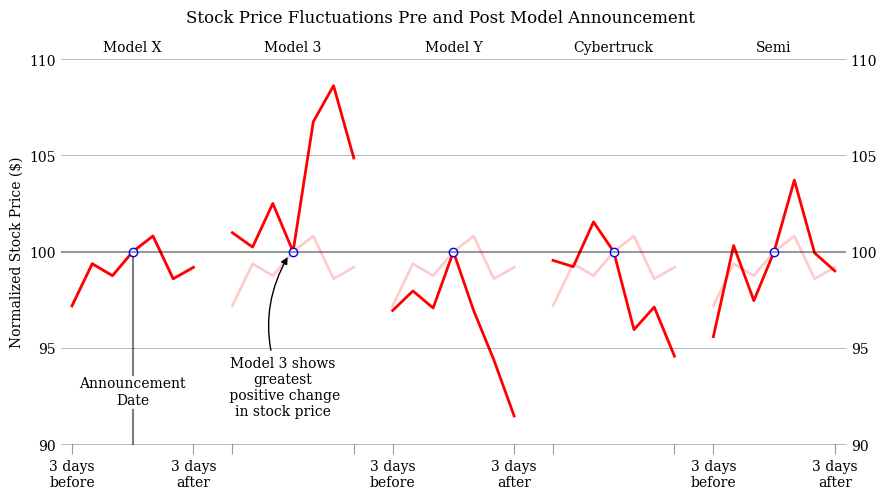

In [17]:
plt.rcParams['font.family']='serif'

yticks=[90,95,100,105,110]
model_names=['Model X','Model 3','Model Y','Cybertruck','Semi']
fig, axs=plt.subplots(1,5,figsize=(10,5),sharey=True)
data_final_normalized.plot(
    ax=axs, subplots=True, legend=False,
    yticks=yticks,xticks=[0,6],
    color='red',linewidth=2, fontsize=10)

for ax in axs:
    ax.set_ylabel('Normalized Stock Price ($)')
    
    ## This segment of the code is adapted from QuantEcon's module on Intermediate Plotting
    ## Please check it out using the link in the Citations section!
    
    data_final_normalized['Model X Stock Price'].plot(ax=ax,color='red',alpha=0.2,linewidth=2)
    ax.set_facecolor('white')
    ax.tick_params(which="both", left=False, labelbottom=False)
    ax.tick_params(axis='x', length=7.0, color=(0, 0, 0, 0.4))
    ax.set_ylim((yticks[0], yticks[-1]))
    ax.plot(3, 100, 'o', markeredgecolor='blue', markersize=6, color="white",alpha=1, zorder=10)
    for direction in ['top', 'right', 'left', 'bottom']:
        ax.spines[direction].set_visible(False)
    ax.set_xlabel('')
    for i,name in enumerate(model_names):
        axs[i].set_title(name,fontsize=10)
    axs[-1].tick_params(labelright=True, labelsize=10)
    axs[-1]
    
for ax in axs[[0,2,4]]:
    ax.tick_params(labelbottom=True)
    ax.set_xticklabels(['3 days\nbefore', '3 days\nafter'])
    for label in ax.xaxis.get_ticklabels():
        label.set_horizontalalignment('center')
        
from matplotlib import transforms
trans = transforms.blended_transform_factory(fig.transFigure, axs[0].transData)

for y in yticks:
    l = plt.Line2D(
        [0.12, 0.905], [y, y],
        transform=trans,
        color='black', alpha=0.4, linewidth=0.5,
        zorder=0.1, solid_capstyle='butt')
    if y == 100:
        l.set_linewidth(1.5)
    fig.lines.append(l)

for y in ([90, 91.8], [93.6, 99.7]):
    l = plt.Line2D(
        [3, 3], y,
        transform=axs[0].transData,
        color='black', alpha=0.5, linewidth=1.5, zorder=0.1)
    fig.lines.append(l)
axs[0].annotate(
    'Announcement\nDate',
    xy=(3, 99.5), xycoords='data', xytext=(3, 92.1),
    annotation_clip=False,
    horizontalalignment='center',
    fontsize=10)
axs[1].annotate('Model 3 shows\ngreatest\n positive change\nin stock price',xy=(2.80, 99.85), xycoords='data', xytext=(2.5, 91.5),
                annotation_clip=False,
                horizontalalignment='center',
                arrowprops={
                'arrowstyle': '-|>',
                'connectionstyle': 'angle3,angleA=-65,angleB=60',
                'color':'black'},fontsize=10)
    
fig.set_facecolor('white')
fig.subplots_adjust(wspace=0.2)
fig.suptitle('Stock Price Fluctuations Pre and Post Model Announcement',fontsize=12,y=0.98)
fig1=fig

#### Discussing the Visualization

The visualization above reveals a number of interesting facts that may have been against the intuition of many. Let's break them down!

My intuition (and perhaps the intuition of many others) while undertaking this project was that the Tesla stock price should show some upward, positive movement following the announcements given how innovative their cars were. However, what the data and the above visualization convey is quite the opposite.

Barring Model 3, the opening stock prices seem to dip within 1 to 2 trading days. The dip is most severe in Model Y, while the increase in stock price is the greatest following the announcement of Model 3. This makes sense Model 3 saw an extremely positive response from the public following it's announcement, given its relative affordability and impressive range.

##### What Does The Data Tell Us?

Stock prices are one of they key indicators of investor reaction to company decisions so any postive/negative movement in stock prices can be correlated (not causated) with how investors feel about the direction the company's headed. Given that the stock prices seem to have dipped for all models within 3 trading days, excluding Model 3, this could be interpreted as one of the many indications that could convey <b>investor hesitancy</b> about the Tesla's expected long-term profitability. 

Logically, if investors positively recieved the announcement of new models (i.e., expected improvements in short-term and/or long-term profitability), the stock prices should've shown some degree of a prolonged upward trend. The absence of this in the case of most models, thus <b>may</b> convey the fact that investors had negative views regarding Tesla's profitability following the announcements. 

However, in the automotive industry, the announcement of new models does not necessarily equate to the fact that these models are ready for sale. Thus, although the stock prices may have dropped following the announcement, it would be interesting to look at how the stock prices were impacted following the sale of these models. 

While the stock price movement following the announcement of models gave us an indication of investor expecations on the company's long-term profitability, looking at the stock price movement following the sale of models, would give us a more direct indication of whether or not the model's performance in terms of overall sales surpassed the investor expectations. 

#### Exploring the Stock Price Following the Sale of the Models

Here, we use a similar methodology to the one above, looking at the opening stock price 3 trading before and after the sale of the model. The day of the sale is once again referred to as Day 0.

In [18]:
sale_model=['Model S','Model X','Model 3', 'Model Y','Semi']
sale_date=['22/6/2012','29/09/2015','28/07/2017','13/03/2020','01/12/2022']
sale_model_s=data.loc['2012-06-19':'2012-06-27']
sale_model_x=data.loc['2015-09-24':'2015-10-02']
sale_model_3=data.loc['2017-07-25':'2017-08-02']
sale_model_y=data.loc['2020-03-10':'2020-03-18']
sale_model_semi=data.loc['2022-11-28':'2022-12-6']

In [19]:
sale_model_s=reset_index(sale_model_s)
sale_model_x=reset_index(sale_model_x)
sale_model_3=reset_index(sale_model_3)
sale_model_y=reset_index(sale_model_y)
sale_model_semi=reset_index(sale_model_semi)
sale_data=pd.concat([sale_model_s,sale_model_x,sale_model_3,sale_model_y,sale_model_semi],axis=1)

In [20]:
sale_data=sale_data.drop(['High','Low','Close','Volume'],axis=1)

In [21]:
sale_data.columns=['Model S Stock Price','Model X Stock Price','Model 3 Stock Price','Model Y Stock Price','Semi Stock Price']

In [22]:
sale_data_normalized=sale_data.apply(normalize_prices)
sale_data_normalized

,Model S Stock Price,Model X Stock Price,Model 3 Stock Price,Model Y Stock Price,Semi Stock Price
Delta Days,,,,,
-3,98.223899,103.621544,102.407466,110.828478,91.313172
-2,102.760779,106.448348,101.030308,107.596548,93.865435
-1,105.093636,102.751343,102.704448,97.628489,92.566470
0,100.000000,100.000000,100.000000,100.000000,100.000000
1,104.113560,100.615070,99.587699,78.907497,97.310737
2,98.315925,98.822564,95.876986,73.951198,96.123402
3,97.855795,94.067304,94.672140,65.378012,91.949970


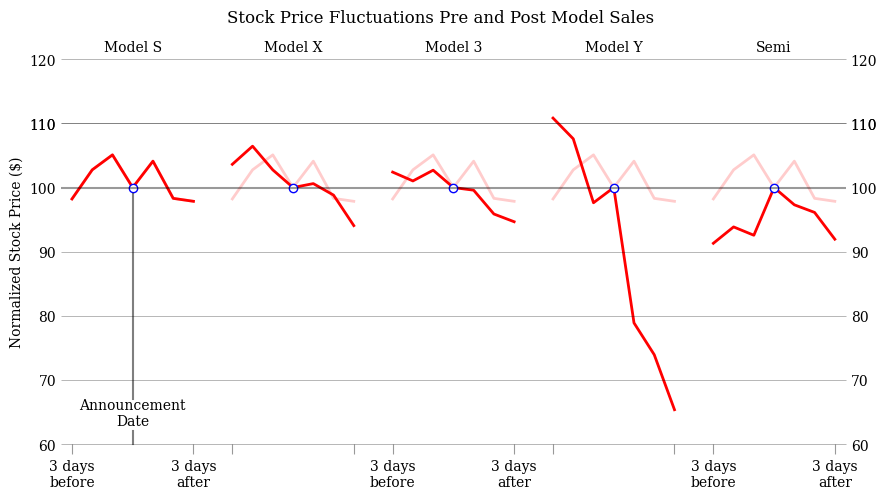

In [23]:
plt.rcParams['font.family']='serif'

yticks=[60,70,80,90,100,110,110,120]
model_names=['Model S','Model X','Model 3','Model Y','Semi']
fig, axs=plt.subplots(1,5,figsize=(10,5),sharey=True)
sale_data_normalized.plot(
    ax=axs, subplots=True, legend=False,
    yticks=yticks,xticks=[0,6],
    color='red',linewidth=2, fontsize=10)

for ax in axs:
    ax.set_ylabel('Normalized Stock Price ($)')
    
    ## This segment of the code is adapted from QuantEcon's module on Intermediate Plotting
    ## Please check it out using the link in the Citations section!
    sale_data_normalized['Model S Stock Price'].plot(ax=ax,color='red',alpha=0.2,linewidth=2)
    ax.set_facecolor('white')
    ax.tick_params(which="both", left=False, labelbottom=False)
    ax.tick_params(axis='x', length=7.0, color=(0, 0, 0, 0.4))
    ax.set_ylim((yticks[0], yticks[-1]))
    ax.plot(3, 100, 'o', markeredgecolor='blue', markersize=6, color="white",alpha=1, zorder=10)
    for direction in ['top', 'right', 'left', 'bottom']:
        ax.spines[direction].set_visible(False)
    ax.set_xlabel('')
    for i,name in enumerate(model_names):
        axs[i].set_title(name,fontsize=10)
    axs[-1].tick_params(labelright=True, labelsize=10)
    axs[-1]
    
for ax in axs[[0,2,4]]:
    ax.tick_params(labelbottom=True)
    ax.set_xticklabels(['3 days\nbefore', '3 days\nafter'])
    for label in ax.xaxis.get_ticklabels():
        label.set_horizontalalignment('center')
        
from matplotlib import transforms
trans = transforms.blended_transform_factory(fig.transFigure, axs[0].transData)

for y in yticks:
    l = plt.Line2D(
        [0.12, 0.905], [y, y],
        transform=trans,
        color='black', alpha=0.4, linewidth=0.5,
        zorder=0.1, solid_capstyle='butt')
    if y == 100:
        l.set_linewidth(1.5)
    fig.lines.append(l)

for y in ([60, 62], [67, 99]):
    l = plt.Line2D(
        [3, 3], y,
        transform=axs[0].transData,
        color='black', alpha=0.5, linewidth=1.5, zorder=0.1)
    fig.lines.append(l)
axs[0].annotate(
    'Announcement\nDate',
    xy=(3, 63), xycoords='data', xytext=(3, 63),
    annotation_clip=False,
    horizontalalignment='center',
    fontsize=10)
    
fig.set_facecolor('white')
fig.subplots_adjust(wspace=0.2)
fig.suptitle('Stock Price Fluctuations Pre and Post Model Sales',fontsize=12,y=0.98)
fig2=fig

#### What Does The Data Tell Us? 

First, it is important to note that we have included Model S in the above visualization as the sale of it happened following Tesla's IPO. Second, it is interesting to note that whilst a lot there are a lot of similarities between the movement of stock prices pre and post sales and pre and post announcement, there is a stark difference in the stock's performance following the sale of Model 3. 

There could be a number of explanantions for this. A rather simplistic explanation would follow that the sale of Model 3 would have had little effect on the stock price, and that the drop was perhaps owing to other, more profound factors. A more nuanced explanantion may follow that investors were underwhelmed by the (sale) performance of Model 3 and/or expected Model 3 to be recieved harshly by the public. Therefore, they may have developed negative sentiments towards Tesla's profitability, which could therefore be explained by the stock's performance following the sale of the model. 

Interstingly, this is the case for all of Tesla's new models. The stock price seems to dip following the sale date, which may convey a lot about how investors expect the models to perform in the market and how the models actually perform. 

#### Conclusion 

The issue of confounding is something that plagues all statistical/econometric explorations and so it does with this research as well. It is important to note that this research does not definitively hint towards an evidence-based conclusion, as doing so would require a much more detailed dive into Tesla's stock profile. This project does however, look into possible explanations  to detail the trend observed in the stock before and after important decisions that impact the future of the company. 

This form of pre and post analysis allowed us to look at why the stock fluctuated the way it did and draw possible conclusions that may aid the decision-making process of current or future investors. 

#### Citations

1. Coding template for the visualization: https://datascience.quantecon.org/pandas/matplotlib.html
2. Dataset: https://ca.finance.yahoo.com/quote/TSLA/history?period1=1529452800&period2=1687219200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true 